Glass Identification Dataset
Problem Statement:
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-

 1 Id number: 1 to 214
 2 RI: refractive index
 3 Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4 Mg: Magnesium
5 Al: Aluminum
6 Si: Silicon
7 K: Potassium
8 Ca: Calcium
9 Ba: Barium
10 Fe: Iron
11 Type of glass: (class attribute)
1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


Predict : Type of glass

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv
https://github.com/dsrscientist/datase

In [122]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
Glass= pd.read_csv('glass.csv',names= ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type'])
Glass

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
Glass.shape

(214, 11)

In [4]:
Glass.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'glass_type'],
      dtype='object')

In [5]:
Glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  glass_type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
Glass.columns.str.replace(' ', '_')
Glass.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'glass_type'],
      dtype='object')

In [7]:
Glass.isnull().sum()     #no Missing Values

Id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

In [8]:
Glass.duplicated().sum()

0

In [9]:
#dropping duplicate rows and resetting index
GlassGlassn=Glass.drop_duplicates()
print('Number of rows after removing duplicates=', len(Glass))

Number of rows after removing duplicates= 214


<AxesSubplot:>

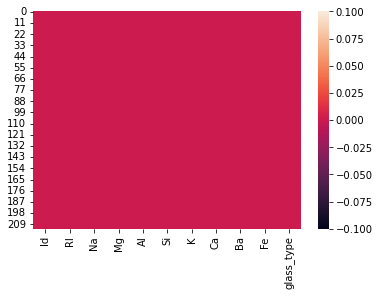

In [10]:
sns.heatmap(Glass.isnull())

In [11]:
Glass.duplicated().sum()

0

Univariate Analysis 'Subscribed' variable

In [12]:
#Frequency of 'Glass types'
Glass['glass_type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64

<AxesSubplot:xlabel='glass_type', ylabel='count'>

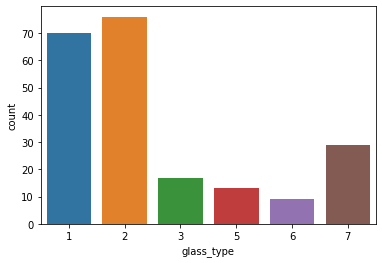

In [13]:
# Plotting the 'subscribed' frequency
sns.countplot(data=Glass,x='glass_type')

In [14]:
#Normalizing the frequency table of 'Subscribed' variable
Glass['glass_type'].value_counts(normalize=True)

2    0.355140
1    0.327103
7    0.135514
3    0.079439
5    0.060748
6    0.042056
Name: glass_type, dtype: float64

In [15]:
#Frequency table
Glass['glass_type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64

# EDA

In [16]:
Glass.dtypes

Id              int64
RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
Fe            float64
glass_type      int64
dtype: object

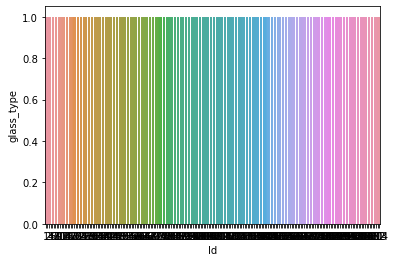

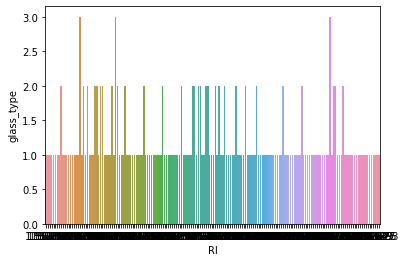

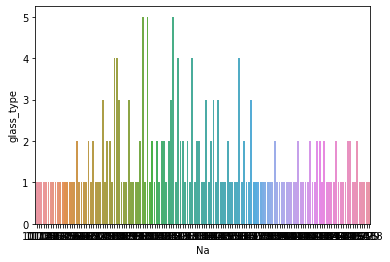

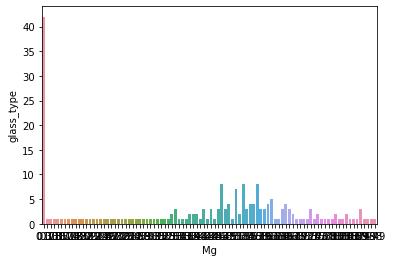

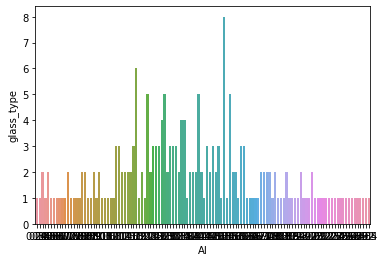

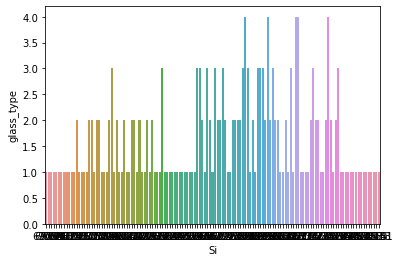

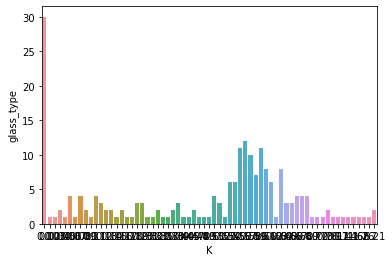

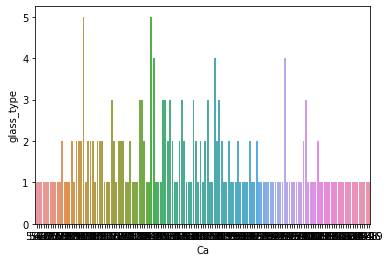

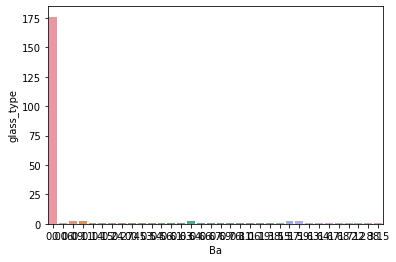

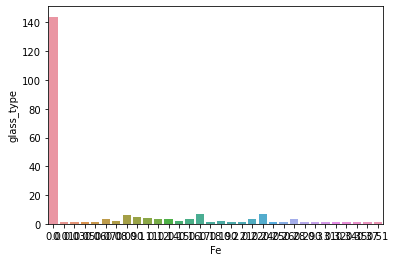

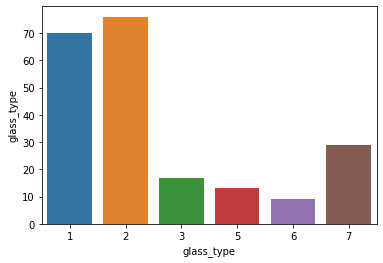

In [17]:
for column in Glass.columns:
    sns.countplot(x=column, data=Glass)
    plt.xlabel(column)
    plt.ylabel('glass_type')
    plt.show()

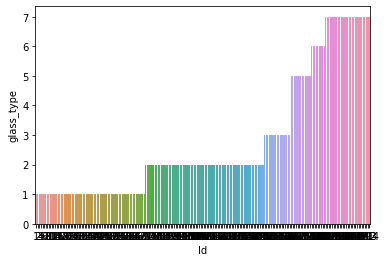

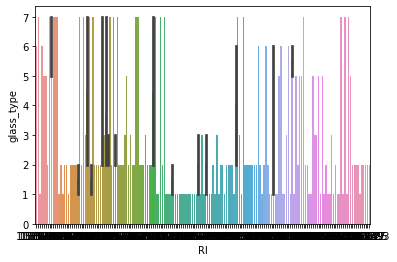

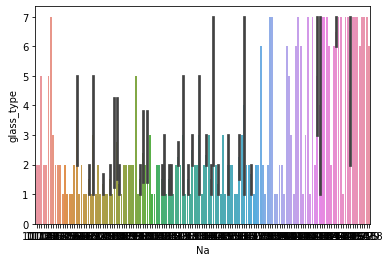

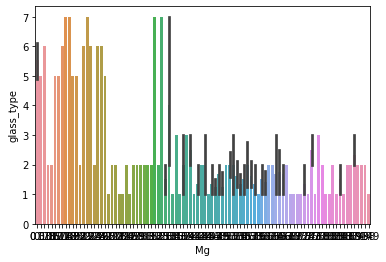

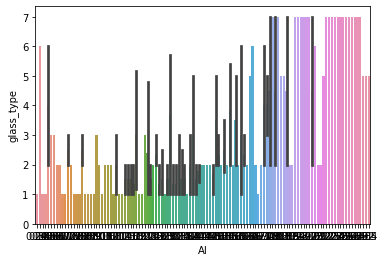

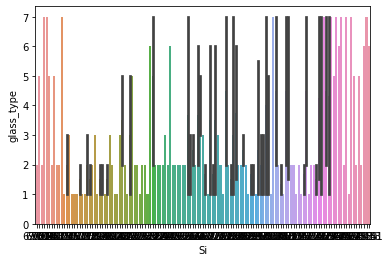

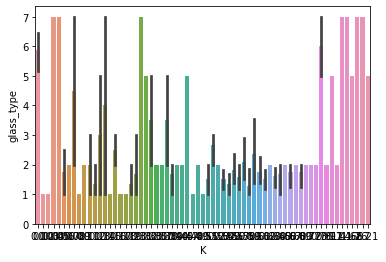

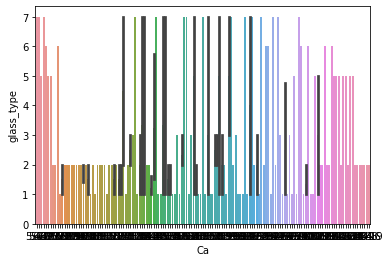

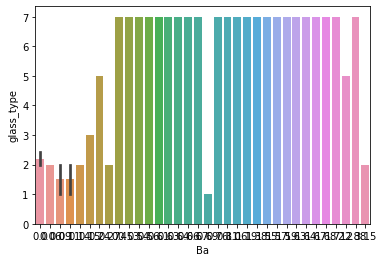

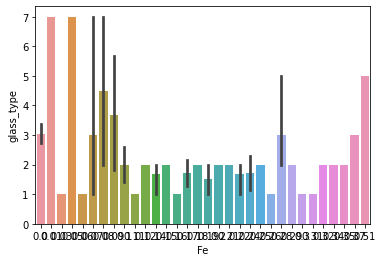

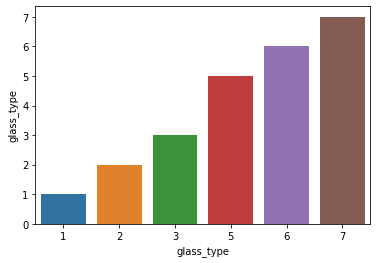

In [18]:
for column in Glass.columns:
    sns.barplot(x=column, y='glass_type', data=Glass)
    plt.xlabel(column)
    plt.show()

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'RI'}>,
        <AxesSubplot:title={'center':'Na'}>],
       [<AxesSubplot:title={'center':'Mg'}>,
        <AxesSubplot:title={'center':'Al'}>,
        <AxesSubplot:title={'center':'Si'}>],
       [<AxesSubplot:title={'center':'K'}>,
        <AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'Ba'}>],
       [<AxesSubplot:title={'center':'Fe'}>,
        <AxesSubplot:title={'center':'glass_type'}>, <AxesSubplot:>]],
      dtype=object)

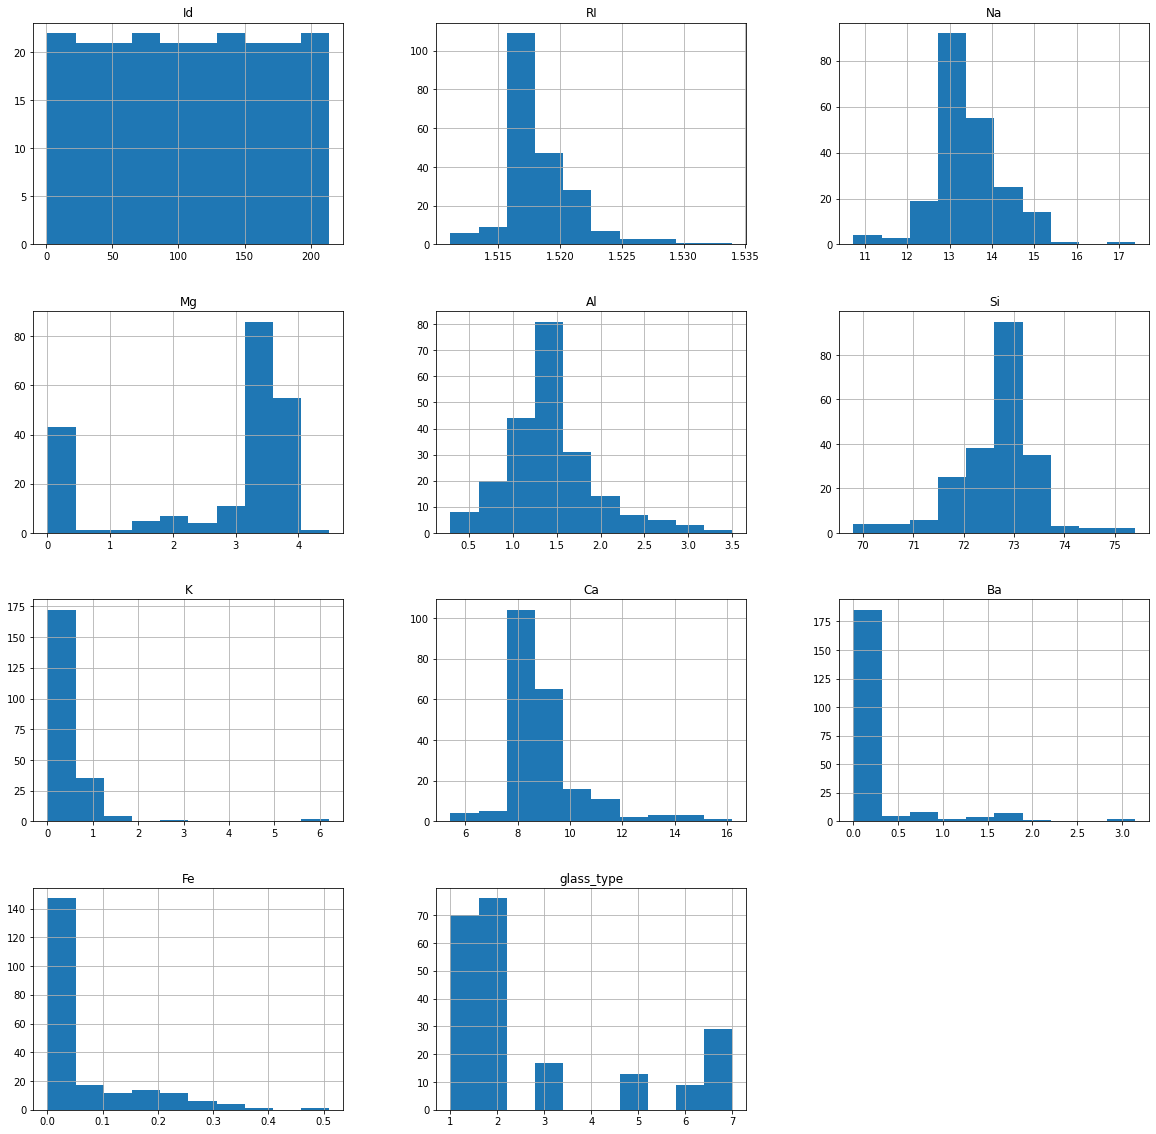

In [19]:
Glass.hist(bins=10, figsize=(20,20))

# Multivarate 

<AxesSubplot:xlabel='RI', ylabel='glass_type'>

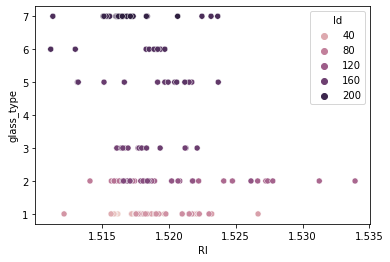

In [20]:
sns.scatterplot(x='RI',y='glass_type',hue='Id',data=Glass)

<AxesSubplot:xlabel='Na', ylabel='glass_type'>

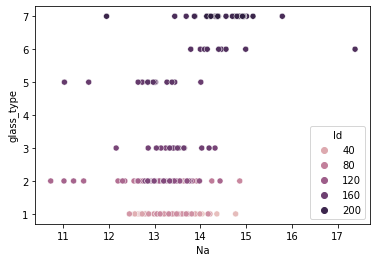

In [21]:
sns.scatterplot(x='Na',y='glass_type',hue='Id',data=Glass)

<AxesSubplot:xlabel='Mg', ylabel='glass_type'>

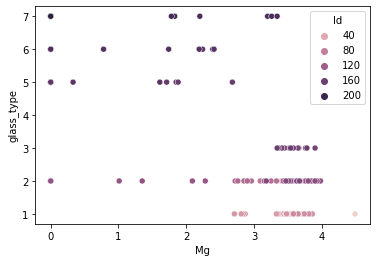

In [22]:
sns.scatterplot(x='Mg',y='glass_type',hue='Id',data=Glass)

<AxesSubplot:xlabel='Al', ylabel='glass_type'>

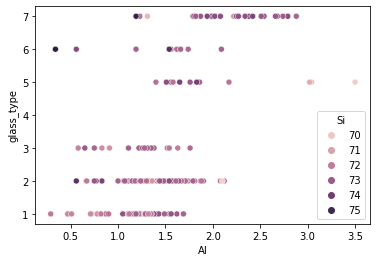

In [23]:
sns.scatterplot(x='Al',y='glass_type',hue='Si',data=Glass)

<AxesSubplot:xlabel='K', ylabel='glass_type'>

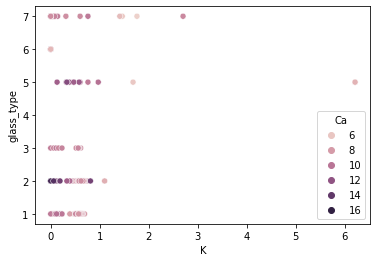

In [24]:
sns.scatterplot(x='K',y='glass_type',hue='Ca',data=Glass)

<AxesSubplot:xlabel='Ba', ylabel='glass_type'>

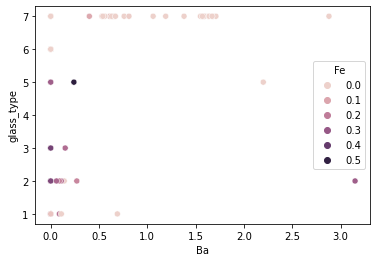

In [25]:
sns.scatterplot(x='Ba',y='glass_type',hue='Fe',data=Glass)

<AxesSubplot:xlabel='RI', ylabel='Density'>

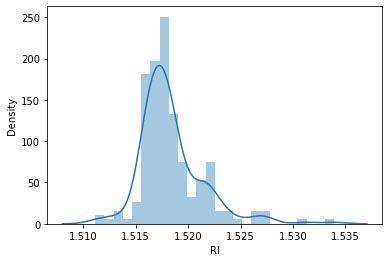

In [26]:
sns.distplot(Glass['RI'])

<AxesSubplot:xlabel='Na', ylabel='Density'>

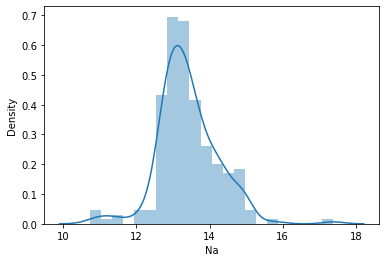

In [27]:
sns.distplot(Glass['Na'])

<AxesSubplot:xlabel='Mg', ylabel='Density'>

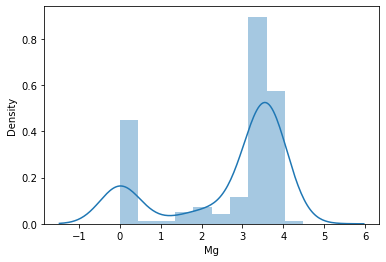

In [28]:
sns.distplot(Glass['Mg'])

<AxesSubplot:xlabel='Al', ylabel='Density'>

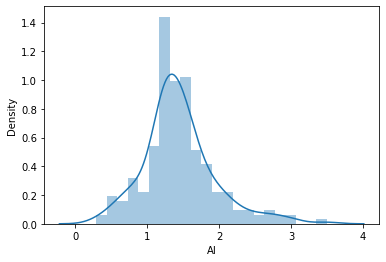

In [29]:
sns.distplot(Glass['Al'])

<AxesSubplot:xlabel='Si', ylabel='Density'>

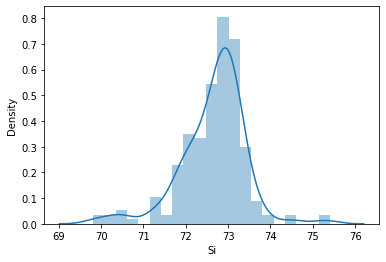

In [30]:
sns.distplot(Glass['Si'])

<AxesSubplot:xlabel='K', ylabel='Density'>

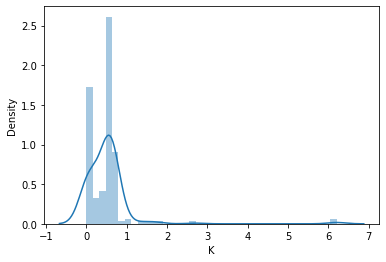

In [31]:
sns.distplot(Glass['K'])

<AxesSubplot:xlabel='Ca', ylabel='Density'>

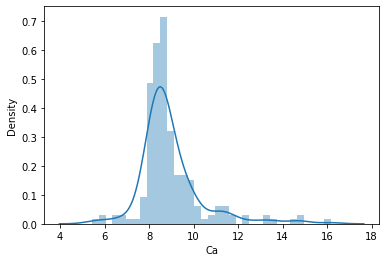

In [32]:
sns.distplot(Glass['Ca'])

<AxesSubplot:xlabel='Ba', ylabel='Density'>

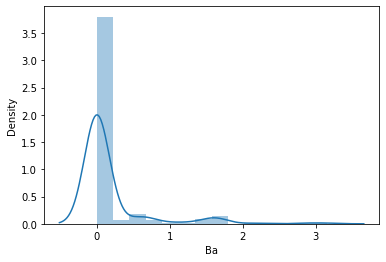

In [33]:
sns.distplot(Glass['Ba'])

<AxesSubplot:xlabel='Fe', ylabel='Density'>

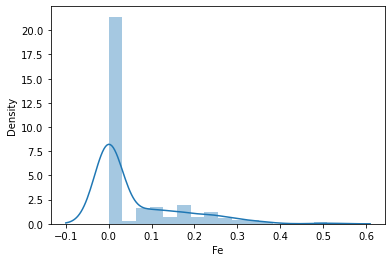

In [34]:
sns.distplot(Glass['Fe'])

<Figure size 1800x2160 with 0 Axes>

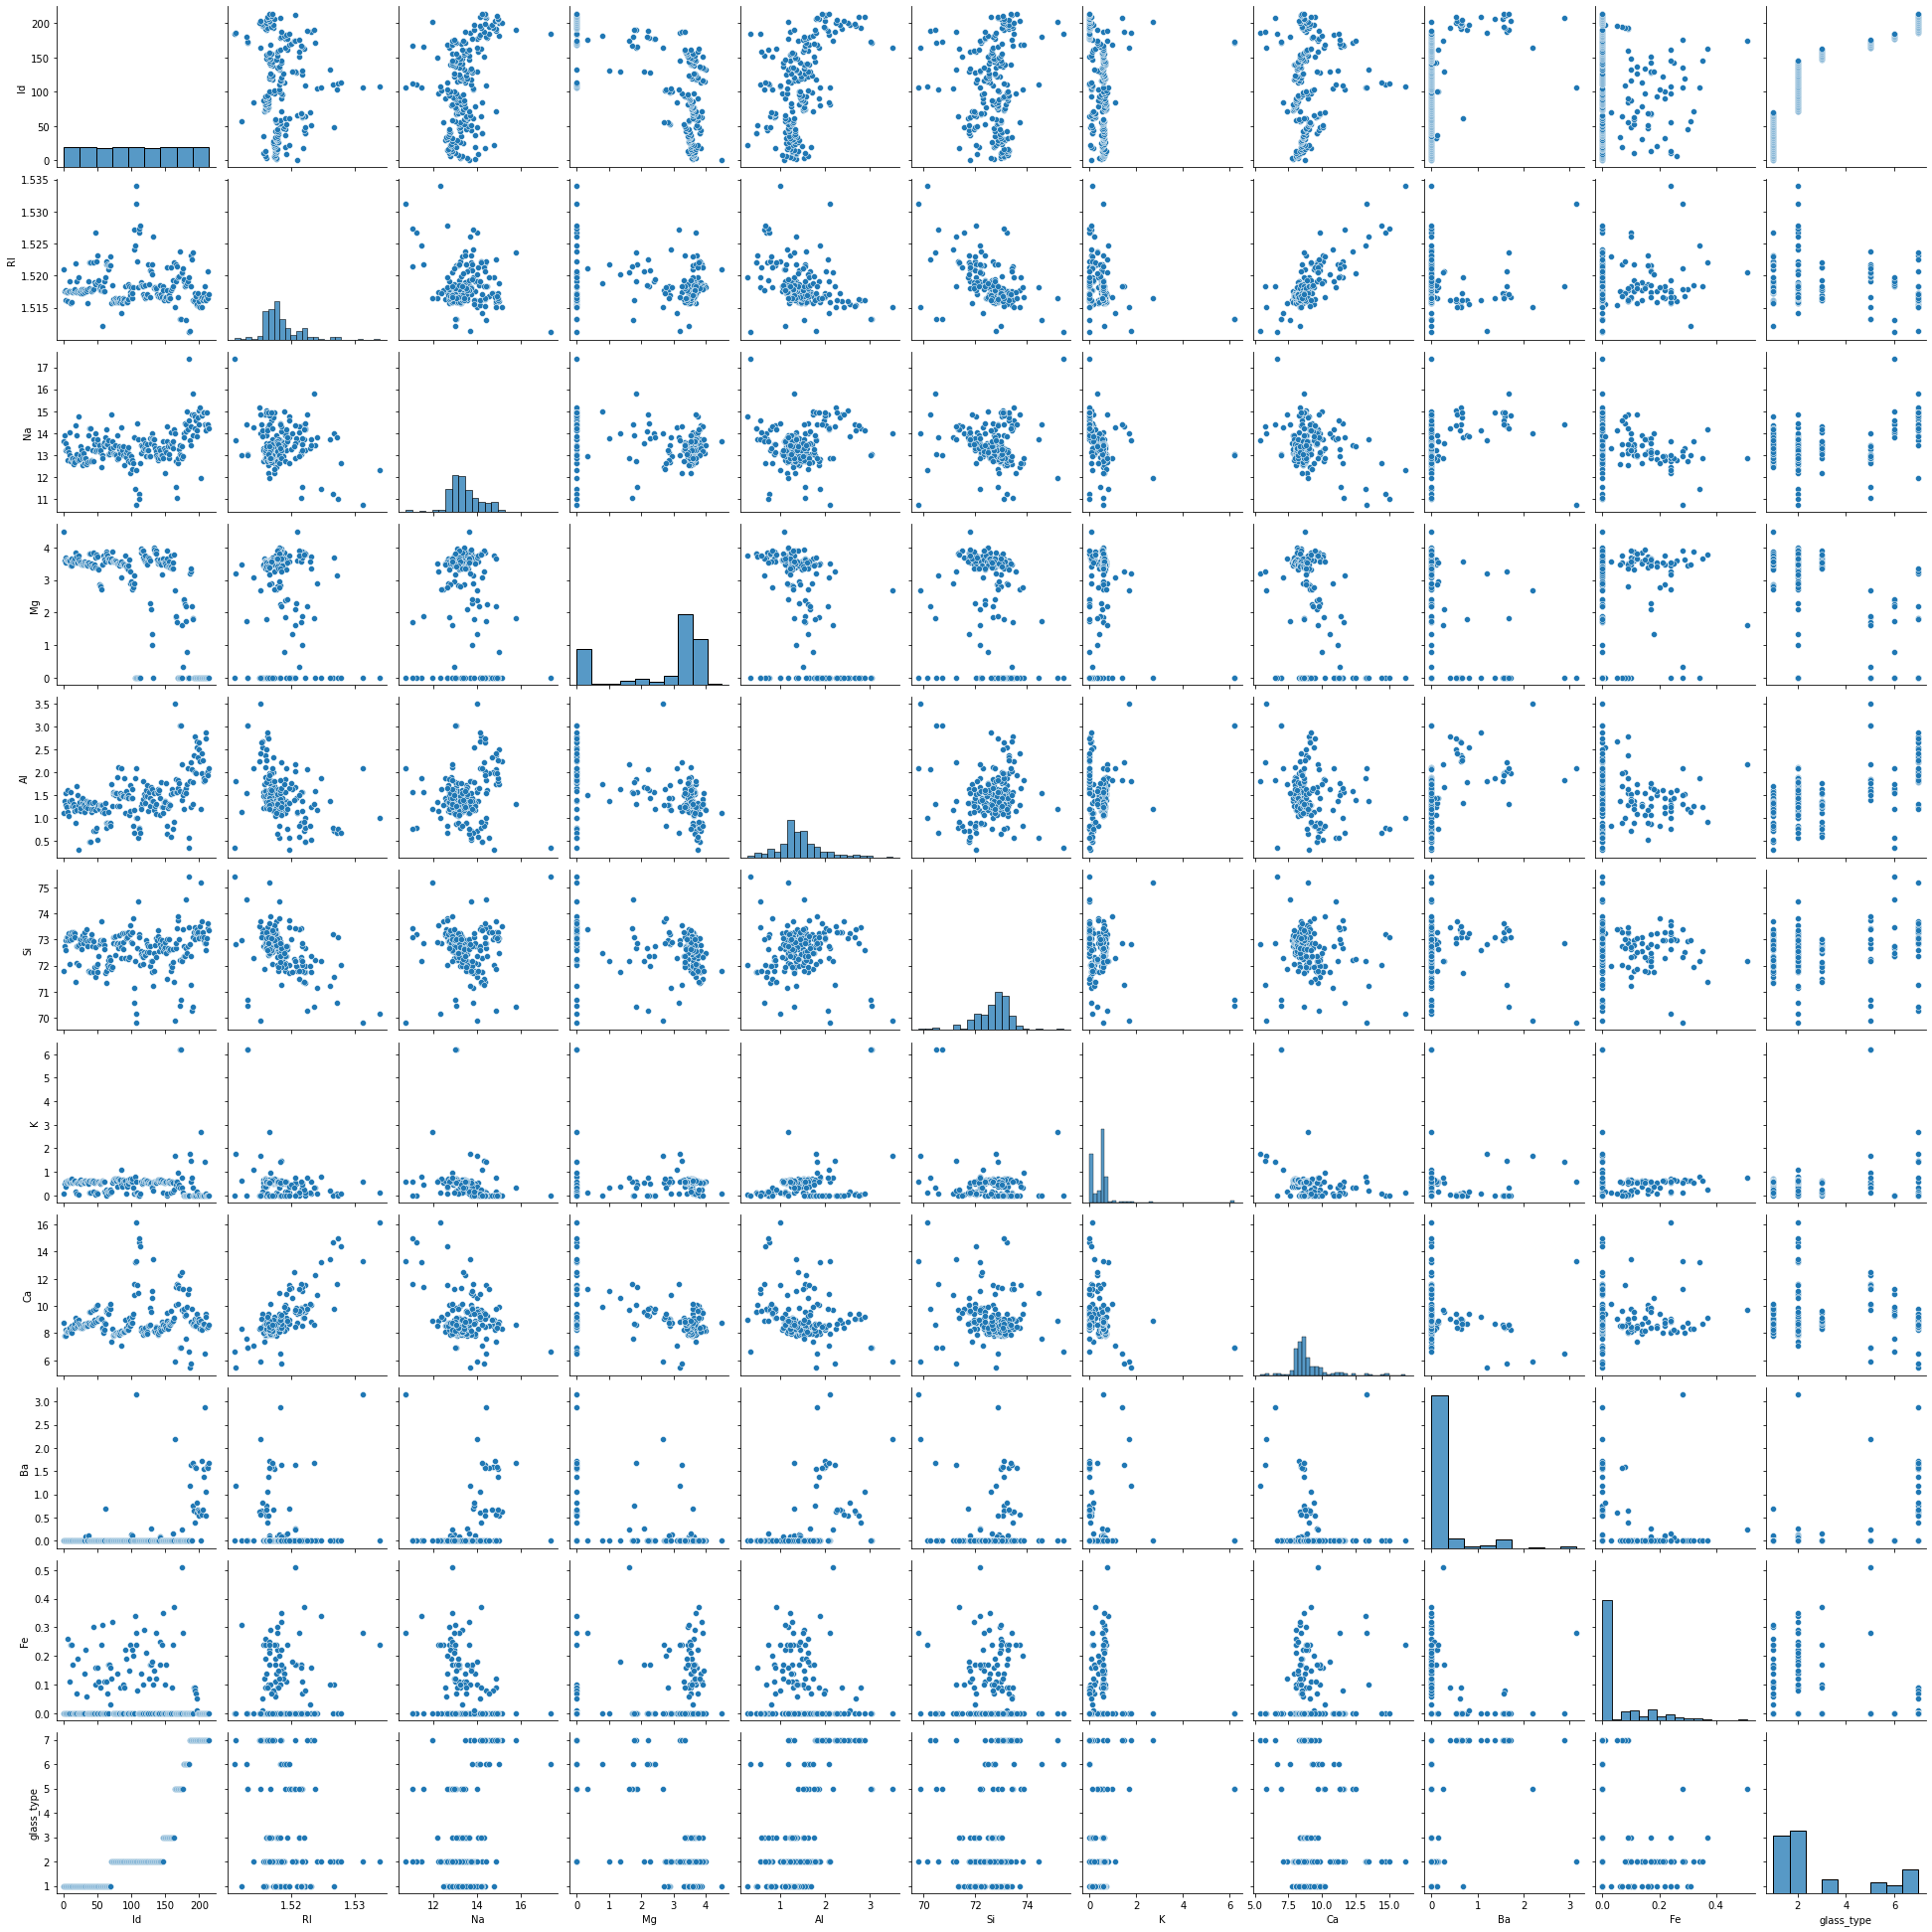

In [35]:
plt.figure(figsize=(25,30))
sns.pairplot(Glass)
plt.show()

Now Lets See that counts of each columns

In [36]:
for i in Glass.columns:
        print(Glass[i].value_counts())
        print('*'*100)

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id, Length: 214, dtype: int64
****************************************************************************************************
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64
****************************************************************************************************
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64
****************************************************************************************************
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64
**********************************************************************

In [37]:
Glass.corr()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
Id,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


In [38]:
Glass.drop("Id",axis=1,inplace=True)

In [39]:
Glass.corr()['glass_type'].sort_values()

Mg           -0.744993
Fe           -0.188278
RI           -0.164237
K            -0.010054
Ca            0.000952
Si            0.151565
Na            0.502898
Ba            0.575161
Al            0.598829
glass_type    1.000000
Name: glass_type, dtype: float64

<AxesSubplot:>

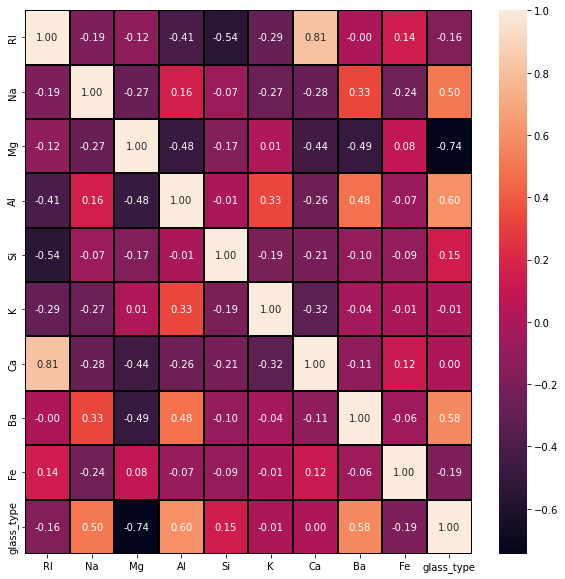

In [40]:
plt.figure(figsize = (10,10))
sns.heatmap(Glass.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

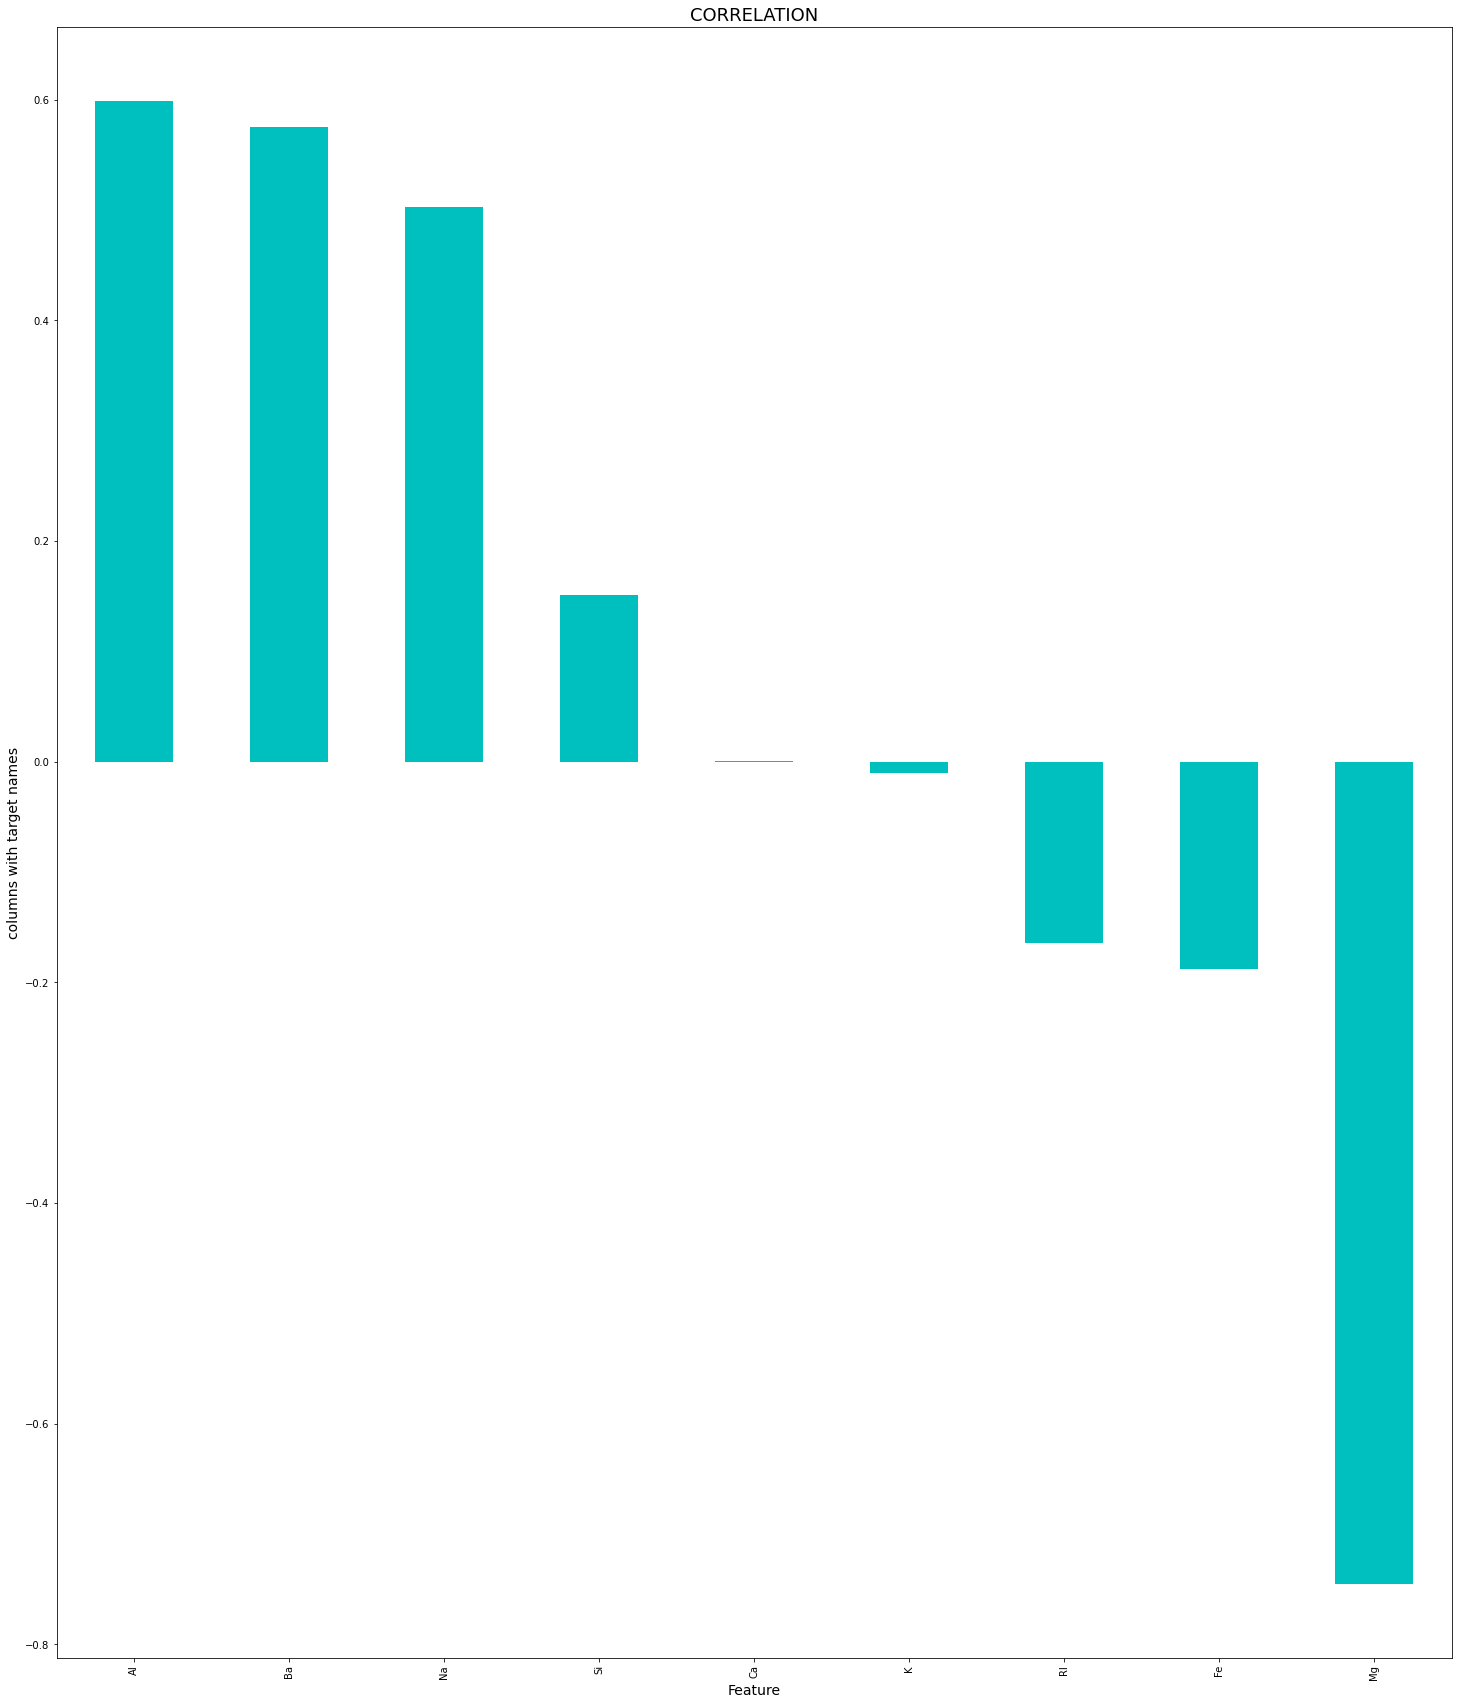

In [41]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
Glass.corr()['glass_type'].sort_values(ascending=False).drop(['glass_type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

In [42]:
Glass.drop('Ba',axis=1,inplace= True)
Glass.drop('Fe',axis=1,inplace= True)

# as these two have high number of 0.0 value so dropping this columns

In [43]:
Glass

,RI,Na,Mg,Al,Si,K,Ca,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,7


# DESCRIPTIVE STATSTICS

In [44]:
Glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,7.000000


In [45]:
Glass.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
glass_type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


<AxesSubplot:>

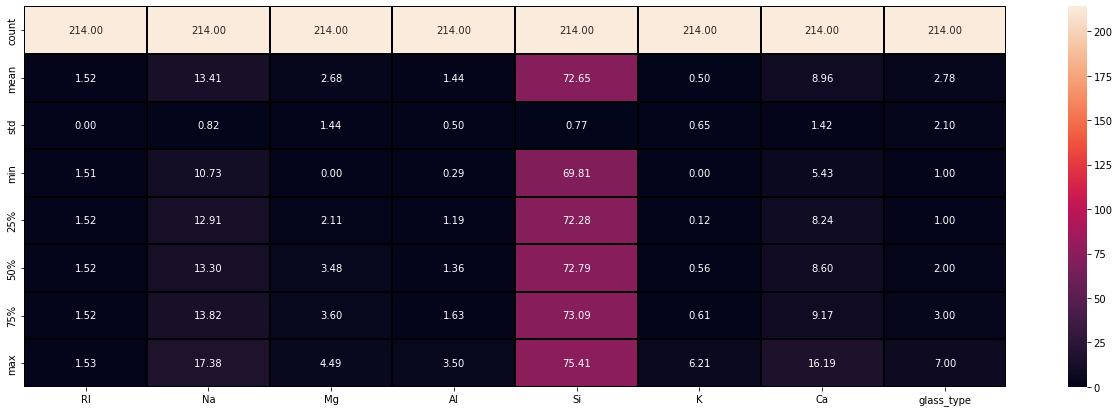

In [46]:
plt.figure(figsize = (22,7))
sns.heatmap(Glass.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [47]:
Glass.skew()

RI            1.625431
Na            0.454181
Mg           -1.152559
Al            0.907290
Si           -0.730447
K             6.551648
Ca            2.047054
glass_type    1.114915
dtype: float64

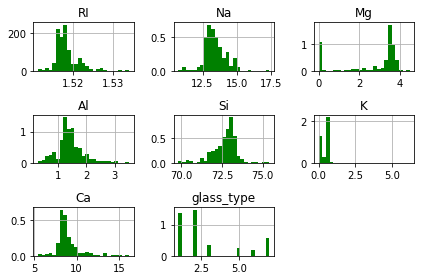

In [48]:
#Lets plot all using Histogram and see the skewness again
 
#plt.rcParams['figure.figsize']=(20,20)
Glass.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

OUTLIERS CHECKING(Any One outlier method can be  used)

In [49]:
colmlist=Glass.columns.values
ncol=30
nrows=14

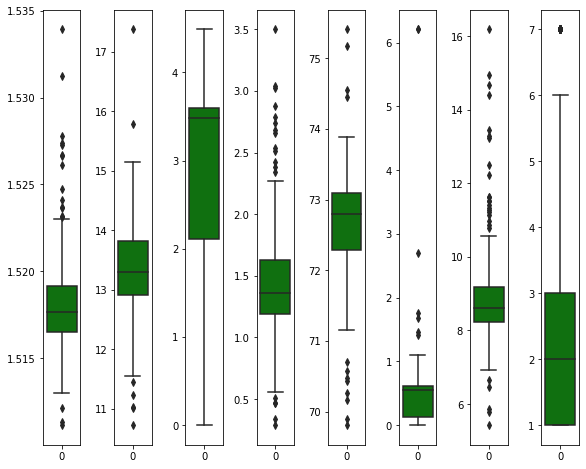

In [50]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= Glass[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

RI               AxesSubplot(0.125,0.125;0.0824468x0.755)
Na            AxesSubplot(0.223936,0.125;0.0824468x0.755)
Mg            AxesSubplot(0.322872,0.125;0.0824468x0.755)
Al            AxesSubplot(0.421809,0.125;0.0824468x0.755)
Si            AxesSubplot(0.520745,0.125;0.0824468x0.755)
K             AxesSubplot(0.619681,0.125;0.0824468x0.755)
Ca            AxesSubplot(0.718617,0.125;0.0824468x0.755)
glass_type    AxesSubplot(0.817553,0.125;0.0824468x0.755)
dtype: object

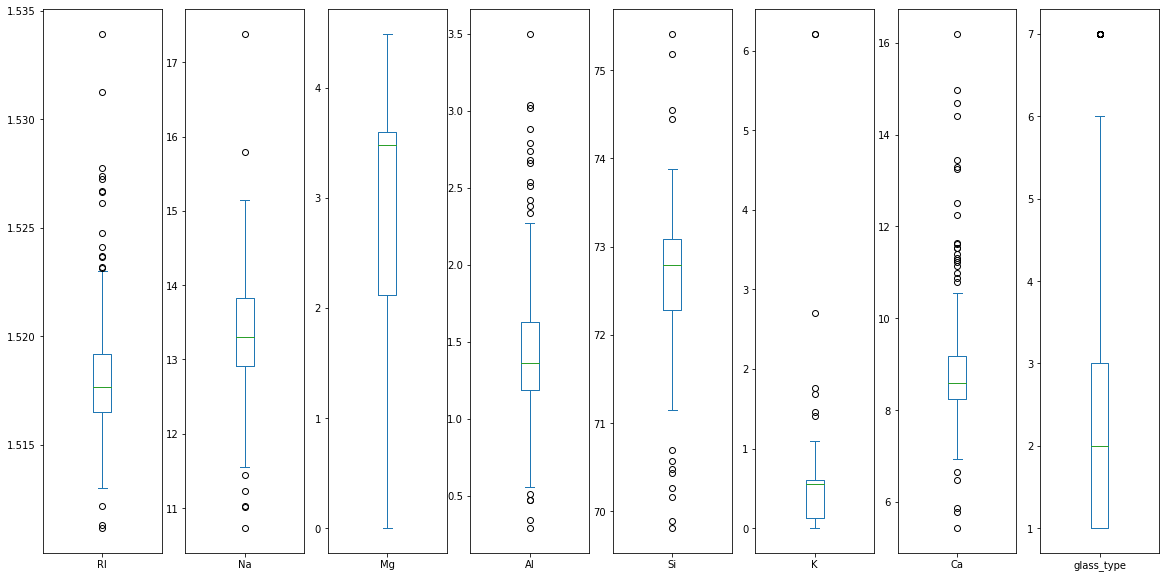

In [51]:
# to find out outliers in the dataset
Glass.plot(kind='box',subplots=True,figsize=(20,10))

the data of the column is not normalised ...The building block is out of normalized curve..It a right skewed data..
we can see that the data is not normally distributed

Normal distribution curve of outcome column is irrelevent

In [52]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore( Glass)) < 3).all()

RI            False
Na            False
Mg             True
Al            False
Si            False
K             False
Ca            False
glass_type     True
dtype: bool

In [53]:
#to remove outliers in data set through zscore
z = np.abs(zscore( Glass))
z

,RI,Na,Mg,Al,Si,K,Ca,glass_type
0,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.848275
1,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.848275
2,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.848275
3,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.848275
4,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.848275
...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,2.010478
210,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.010478
211,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.010478
212,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.010478


In [54]:
threshold = 3
print(np.where(z>3))

(array([105, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112, 131,
       163, 163, 171, 171, 172, 172, 184, 184, 188, 201, 201], dtype=int64), array([6, 0, 1, 4, 6, 0, 4, 6, 6, 6, 0, 6, 6, 3, 4, 3, 5, 3, 5, 1, 4, 4,
       4, 5], dtype=int64))


In [55]:
Glass_new=Glass[(z<3).all(axis=1)]
Glass_new

,RI,Na,Mg,Al,Si,K,Ca,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,7


In [56]:
Glass_new.shape

(201, 8)

In [57]:
Glass.shape

(214, 8)

In [58]:
print ("Old DataFrame =",Glass.shape)
print ("New DataFrame =",Glass_new.shape)
print ("Total dropped rows = ",Glass.shape[0] - Glass_new.shape[0])

Old DataFrame = (214, 8)
New DataFrame = (201, 8)
Total dropped rows =  13


In [59]:
#to find % loss in data
loss = (214-201)/214 * 100
print(loss)

6.074766355140187


In [60]:
Glass_new

,RI,Na,Mg,Al,Si,K,Ca,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,7


In [61]:
# Independent column

x=Glass_new.iloc[:,0:-1]
x

,RI,Na,Mg,Al,Si,K,Ca
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07
...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48


In [62]:
x.shape

(201, 7)

In [63]:
# Target or dependent variable

y=Glass_new.iloc[:,-1]


In [64]:
y.shape

(201,)

# TRANSFORMING DATA TO REMOVE SKEWNESS

In [65]:
Glass_new

,RI,Na,Mg,Al,Si,K,Ca,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,7


In [66]:
Glass_new.skew()

RI            0.929611
Na            0.467939
Mg           -1.423882
Al            0.618731
Si           -0.609247
K             0.417662
Ca            1.009525
glass_type    1.180372
dtype: float64

In [67]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Glass,method='yeo-johnson')

In [68]:
pd.DataFrame(x_new).skew()

0    0.000000
1   -0.008973
2   -0.889528
3    0.000219
4    0.130384
5   -0.071816
6   -0.209314
7    0.201871
dtype: float64

In [69]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca
0,1.257241,0.282870,1.238921,-0.742929,-1.524625,-1.286370,-0.064197
1,-0.218183,0.641362,0.573124,-0.158472,0.041501,0.161761,-0.996749
2,-0.838729,0.125133,0.535720,0.246152,0.470125,-0.148553,-1.047431
3,-0.196486,-0.333737,0.640452,-0.315826,-0.156326,0.472075,-0.601428
4,-0.300633,-0.247698,0.588086,-0.428221,0.618495,0.403116,-0.753474
...,...,...,...,...,...,...,...
196,-0.817032,0.999854,-2.119989,3.258352,-0.156326,-1.217411,0.371669
197,-0.547984,2.118350,-2.119989,1.257712,0.585524,-1.493245,-0.418972
198,1.101020,1.315327,-2.119989,1.325149,1.179003,-1.493245,-0.378427
199,-0.695526,1.344007,-2.119989,1.145316,1.492228,-1.493245,-0.337881


In [70]:
x.mean()

RI    7.166186e-15
Na    8.473045e-16
Mg    8.837596e-17
Al   -3.446663e-16
Si   -9.637399e-15
K     1.568673e-16
Ca    7.687328e-16
dtype: float64

In [71]:
x.std()

RI    1.002497
Na    1.002497
Mg    1.002497
Al    1.002497
Si    1.002497
K     1.002497
Ca    1.002497
dtype: float64

In [72]:
Glass_new['glass_type'].value_counts()

1    70
2    69
7    27
3    17
5    10
6     8
Name: glass_type, dtype: int64

Balancing the dataset over here,otherwise it will be a baised dataset

In [73]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [74]:
x.shape

(420, 7)

In [75]:
y.shape

(420,)

In [76]:
y.value_counts()

1    70
2    70
3    70
5    70
6    70
7    70
Name: glass_type, dtype: int64

<AxesSubplot:xlabel='glass_type', ylabel='count'>

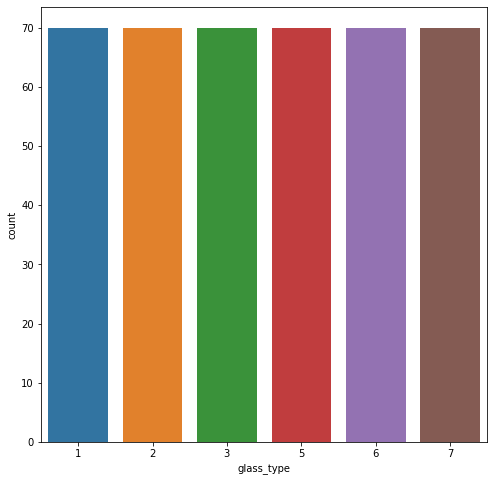

In [77]:
plt.figure(figsize=(8,8))
sns.countplot(y)

In [78]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [79]:
vif_cal()

   VIF FACTOR FEATURES
0    5.285683       RI
1   12.687437       Na
2   25.039534       Mg
3    5.738611       Al
4    7.917861       Si
5    4.903108        K
6   11.886882       Ca


# No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models...


In [80]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1,201):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)

Best accuracy is 0.9047619047619048 on Random_State 103


In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=103)

In [91]:
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (336, 7)
shape of y_train: (336, 7)
shape of x_test: (84, 7)
shape of y_test: (84,)


In [92]:
x_train

,RI,Na,Mg,Al,Si,K,Ca
29,-0.118375,-0.520153,0.490834,-0.338305,0.255813,0.575513,-0.327744
245,0.418829,0.084964,0.444448,-0.037064,-1.188301,0.210049,0.209484
45,0.385005,0.067775,0.483354,-0.180951,-1.244371,0.403116,0.189213
265,1.117180,-1.282895,-1.526248,0.550892,0.417752,0.127282,2.579378
329,0.449455,1.012651,-2.090600,1.465163,0.055916,-1.493245,2.066496
...,...,...,...,...,...,...,...
313,0.703923,-1.136927,-2.112596,0.483997,1.705252,-0.208846,2.745837
347,0.429113,1.440371,-0.984916,0.136493,-0.143786,-1.493245,1.069643
275,1.528388,-2.407529,-0.881191,0.274864,0.382107,-0.042168,2.611580
73,-0.782316,-0.147321,0.550681,0.313589,0.272298,0.609992,-0.935930


In [93]:
y_test

353    6
294    5
371    6
37     1
122    2
      ..
304    5
297    5
156    5
34     1
57     1
Name: glass_type, Length: 84, dtype: int64

In [94]:
x_test

,RI,Na,Mg,Al,Si,K,Ca
353,0.489159,0.817497,-1.433039,0.711638,0.070549,-1.493245,1.666151
294,1.552338,-2.775678,-0.726285,0.291110,0.351294,0.165155,2.653349
371,0.623361,1.425547,-1.726849,-1.462516,0.875547,-1.493245,2.071738
37,-0.061962,-1.007702,0.483354,-0.180951,0.420668,0.713430,-0.135152
122,1.114038,0.153813,-0.556487,0.538380,-0.865204,0.334158,0.766990
...,...,...,...,...,...,...,...
304,0.695100,-0.468642,-1.725103,0.804832,0.376137,0.255176,2.185120
297,0.538048,-0.987850,-0.848999,0.887317,0.090208,0.414513,1.412917
156,0.450097,-1.022042,-0.736028,0.965483,-0.024441,0.575513,1.294084
34,-0.122715,-1.079400,0.528239,-0.203430,0.404183,0.472075,-0.064197


In [95]:
y_train

29     1
245    3
45     1
265    5
329    6
      ..
313    5
347    6
275    5
73     2
263    5
Name: glass_type, Length: 336, dtype: int64

CROSS VALIDATION FOR LOGISTICS REGRESSION,ENSEMBLE TECHNIQUE(GradientBoostingClassifier,RandomForestClassifier)

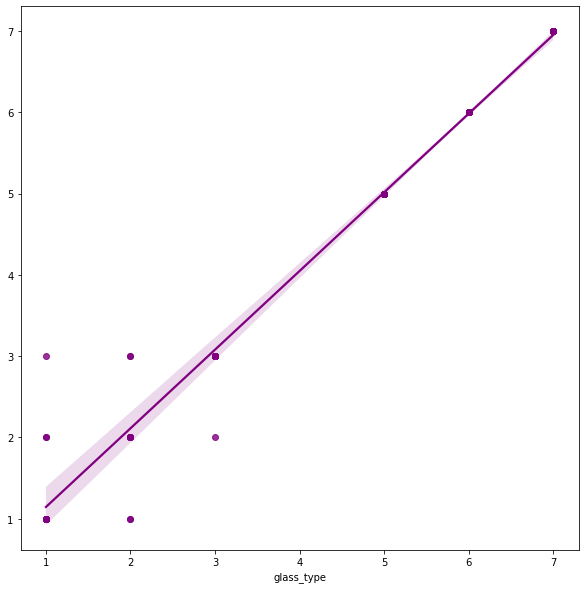

Accuracy_score: LogisticRegression() is
[[ 8  2  1  0  0  0]
 [ 2  6  2  0  0  0]
 [ 0  1 14  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 18]]
0.9047619047619048
              precision    recall  f1-score   support

           1       0.80      0.73      0.76        11
           2       0.67      0.60      0.63        10
           3       0.82      0.93      0.87        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.90        84
   macro avg       0.88      0.88      0.88        84
weighted avg       0.90      0.90      0.90        84





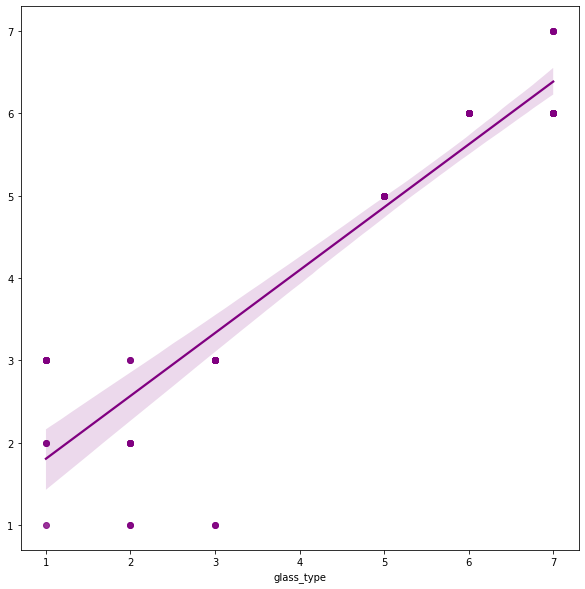

Accuracy_score: GaussianNB() is
[[ 1  2  8  0  0  0]
 [ 2  6  2  0  0  0]
 [ 2  0 13  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0 13  5]]
0.6547619047619048
              precision    recall  f1-score   support

           1       0.20      0.09      0.13        11
           2       0.75      0.60      0.67        10
           3       0.57      0.87      0.68        15
           5       1.00      1.00      1.00        16
           6       0.52      1.00      0.68        14
           7       1.00      0.28      0.43        18

    accuracy                           0.65        84
   macro avg       0.67      0.64      0.60        84
weighted avg       0.71      0.65      0.62        84





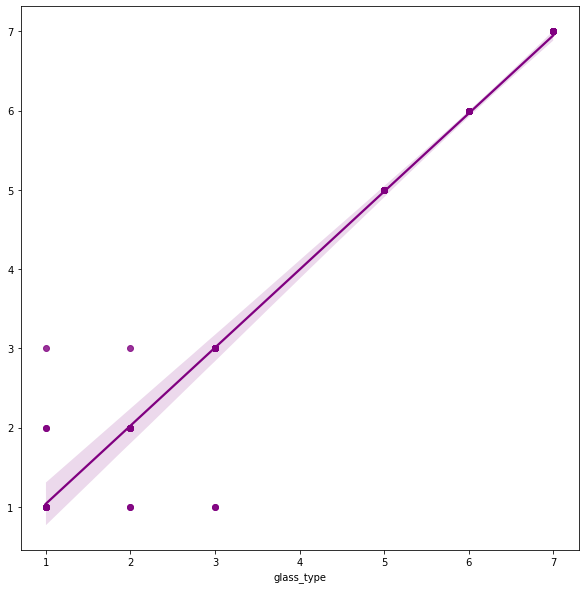

Accuracy_score: SVC() is
[[ 8  2  1  0  0  0]
 [ 2  7  1  0  0  0]
 [ 2  0 13  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 18]]
0.9047619047619048
              precision    recall  f1-score   support

           1       0.67      0.73      0.70        11
           2       0.78      0.70      0.74        10
           3       0.87      0.87      0.87        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.90        84
   macro avg       0.89      0.88      0.88        84
weighted avg       0.91      0.90      0.91        84





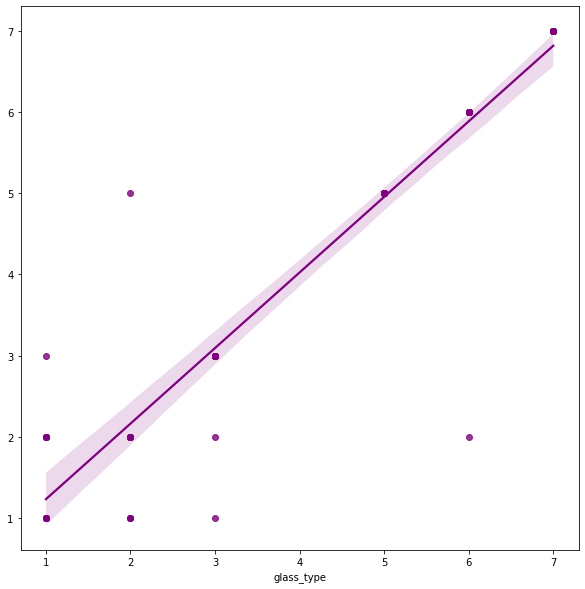

Accuracy_score: DecisionTreeClassifier() is
[[ 5  5  1  0  0  0]
 [ 3  6  0  1  0  0]
 [ 1  1 13  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  1  0  0 13  0]
 [ 0  0  0  0  0 18]]
0.8452380952380952
              precision    recall  f1-score   support

           1       0.56      0.45      0.50        11
           2       0.46      0.60      0.52        10
           3       0.93      0.87      0.90        15
           5       0.94      1.00      0.97        16
           6       1.00      0.93      0.96        14
           7       1.00      1.00      1.00        18

    accuracy                           0.85        84
   macro avg       0.81      0.81      0.81        84
weighted avg       0.85      0.85      0.85        84





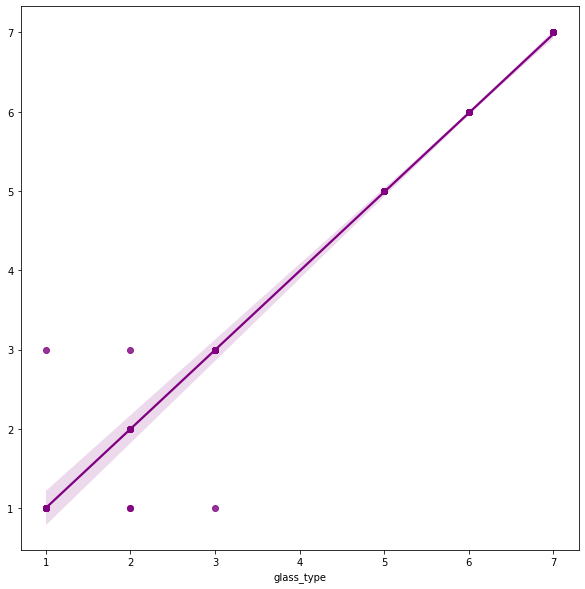

Accuracy_score: KNeighborsClassifier() is
[[10  0  1  0  0  0]
 [ 2  7  1  0  0  0]
 [ 1  0 14  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 18]]
0.9404761904761905
              precision    recall  f1-score   support

           1       0.77      0.91      0.83        11
           2       1.00      0.70      0.82        10
           3       0.88      0.93      0.90        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.94        84
   macro avg       0.94      0.92      0.93        84
weighted avg       0.95      0.94      0.94        84





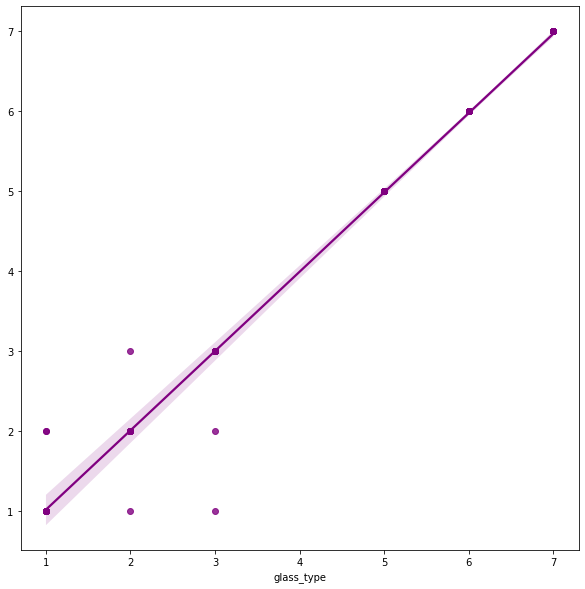

Accuracy_score: GradientBoostingClassifier() is
[[ 9  2  0  0  0  0]
 [ 1  8  1  0  0  0]
 [ 1  1 13  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 18]]
0.9285714285714286
              precision    recall  f1-score   support

           1       0.82      0.82      0.82        11
           2       0.73      0.80      0.76        10
           3       0.93      0.87      0.90        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.93        84
   macro avg       0.91      0.91      0.91        84
weighted avg       0.93      0.93      0.93        84





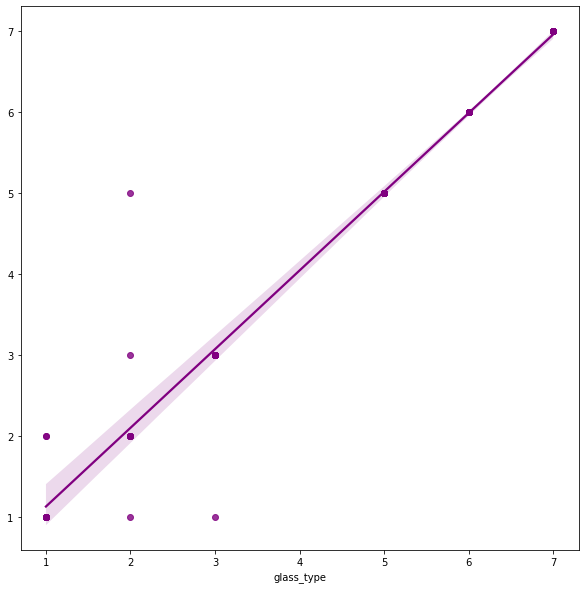

Accuracy_score: RandomForestClassifier() is
[[ 9  2  0  0  0  0]
 [ 1  7  1  1  0  0]
 [ 1  0 14  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 18]]
0.9285714285714286
              precision    recall  f1-score   support

           1       0.82      0.82      0.82        11
           2       0.78      0.70      0.74        10
           3       0.93      0.93      0.93        15
           5       0.94      1.00      0.97        16
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.93        84
   macro avg       0.91      0.91      0.91        84
weighted avg       0.93      0.93      0.93        84





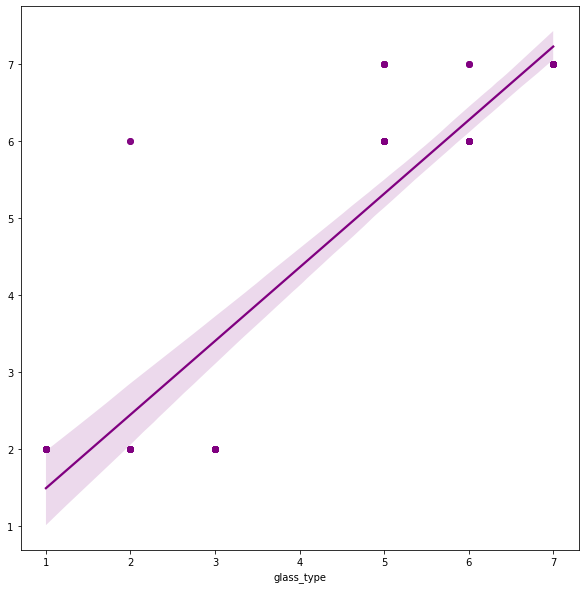

Accuracy_score: AdaBoostClassifier() is
[[ 0 11  0  0  0  0]
 [ 0  8  0  0  2  0]
 [ 0 15  0  0  0  0]
 [ 0  0  0  0 10  6]
 [ 0  0  0  0 11  3]
 [ 0  0  0  0  0 18]]
0.44047619047619047
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.24      0.80      0.36        10
           3       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        16
           6       0.48      0.79      0.59        14
           7       0.67      1.00      0.80        18

    accuracy                           0.44        84
   macro avg       0.23      0.43      0.29        84
weighted avg       0.25      0.44      0.31        84





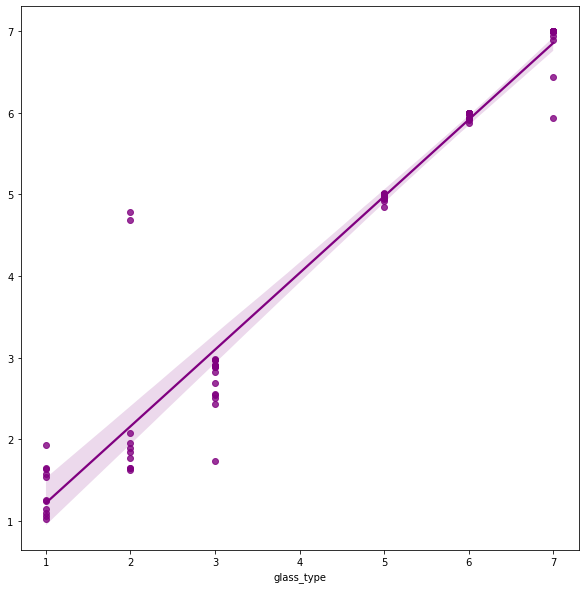

Accuracy_score: ExtraTreesRegressor() is


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [96]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
et = ExtraTreesRegressor()

model=[lg,gnb,svc,dtc,knn,gb,rf,ada,et]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    plt.figure(figsize=(10,10))
    sns.regplot(y_test,predm,color="purple")
    plt.show()
    print("Accuracy_score:",m,'is')
    print(confusion_matrix(y_test, predm))
    print(accuracy_score(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

In [97]:
#cross validation to check the accuracy score

print('cross validation score of logistic regression model = ', cross_val_score(lg,x,y,cv=None).mean())
print('cross validation score of decison tree model = ', cross_val_score(dtc,x,y,cv=None).mean())
print('cross validation score of  KNeighborsClassifier model = ', cross_val_score(knn,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())
print('cross validation score of GaussianNB model = ', cross_val_score(gnb,x,y,cv=None).mean())
print('cross validation score of GradientBoostingClassifier model = ',cross_val_score(gb,x,y,cv=None).mean())
print('cross validation score of AdaBoostingClassifier model = ',cross_val_score(ada,x,y,cv=None).mean())
print('cross validation score of ExtraTreesClassifier model= ',cross_val_score(ada,x,y,cv=None).mean())
print('cross validation score of random forest model = ', cross_val_score(rf,x,y,cv=None).mean())

cross validation score of logistic regression model =  0.8142857142857143
cross validation score of decison tree model =  0.8261904761904763
cross validation score of  KNeighborsClassifier model =  0.8642857142857142
cross validation score of standard vector machine model =  0.8238095238095239
cross validation score of GaussianNB model =  0.630952380952381
cross validation score of GradientBoostingClassifier model =  0.8690476190476192
cross validation score of AdaBoostingClassifier model =  0.46190476190476193
cross validation score of ExtraTreesClassifier model=  0.46190476190476193
cross validation score of random forest model =  0.8690476190476192


Hyper parameter tuning

Plotting ROC and compare AUC for all the models used

In [98]:
# hyperparameter tuning with RandomForestClassifier, parameters of RandomForestClassifier
parameters ={'n_estimators':[200], 'criterion':['gini'], 
             'min_samples_split':[5], 'min_samples_leaf':[2], 
              'bootstrap':[True],'n_jobs':[-1], 'random_state':[103]}

In [99]:
# hyperparameter tuning with gridsearchCV
gcv = GridSearchCV(RandomForestClassifier(random_state=520), parameters, verbose=1, cv=10, n_jobs=-1)

In [100]:
#training the model
gcv.fit(x_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=520),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'min_samples_leaf': [2], 'min_samples_split': [5],
                         'n_estimators': [200], 'n_jobs': [-1],
                         'random_state': [103]},
             verbose=1)

In [101]:
#finding out which parameter is giving best accuracy
gcv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 103}

In [102]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [103]:
# finding best estimator
gcv.best_estimator_

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=103)

In [106]:
# Applying the parameters to the final model
final_model = gcv.best_estimator_.predict(x_test)
acc =accuracy_score(y_test,pred)
print(acc*100)

91.66666666666666


In [109]:
#Loading the saved model
import joblib
joblib.dump(final_model,'Glass Ide.pkl')

['Glass Ide.pkl']

In [136]:
#Loading the saved model
GI=joblib.load('Glass Ide.pkl')

In [143]:
prediction =GI.predict(x_test)
prediction

array([6, 5, 6, 1, 5, 1, 3, 5, 5, 1, 1, 6, 5, 7, 7, 5, 2, 6, 7, 5, 6, 7,
       6, 3, 7, 7, 3, 7, 5, 7, 3, 1, 6, 2, 7, 3, 3, 3, 2, 2, 5, 6, 3, 2,
       3, 2, 5, 7, 1, 7, 5, 3, 6, 6, 5, 6, 7, 2, 7, 1, 3, 6, 6, 7, 1, 3,
       7, 6, 7, 3, 7, 3, 3, 2, 2, 5, 1, 5, 7, 5, 5, 5, 1, 1], dtype=int64)

In [144]:
pd.DataFrame([GI.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
Predicted,6,5,6,1,5,1,3,5,5,1,...,2,5,1,5,7,5,5,5,1,1
Original,6,5,6,1,2,1,2,5,5,1,...,2,5,1,5,7,5,5,5,1,1


In [145]:
import pickle
filename = 'Glass Ide.pkl'
pickle.dump(rf,open(filename, 'wb'))

In [146]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test,y_test)*100
print(result)

92.85714285714286
